In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [16]:
salary = [
    11, 40, 45, 66, 65, 68, 78, 90, 57, 74,
    91, 92, 88, 68, 57, 48, 90, 101, 68, 77,
    110, 140
]


In [17]:
salary


[11,
 40,
 45,
 66,
 65,
 68,
 78,
 90,
 57,
 74,
 91,
 92,
 88,
 68,
 57,
 48,
 90,
 101,
 68,
 77,
 110,
 140]

In [22]:
df = pd.DataFrame(salary, columns=["salary"])

In [18]:
#  five point summary 
# taht are the quartiles

np.quantile(salary,[0,.25,.50,.75,1])

array([ 11.,  59.,  71.,  90., 140.])

In [19]:
df=pd.DataFrame(salary)

In [20]:
df.describe()

,0
count,22.000000
mean,73.818182
std,26.903065
min,11.000000
25%,59.000000
50%,71.000000
75%,90.000000
max,140.000000


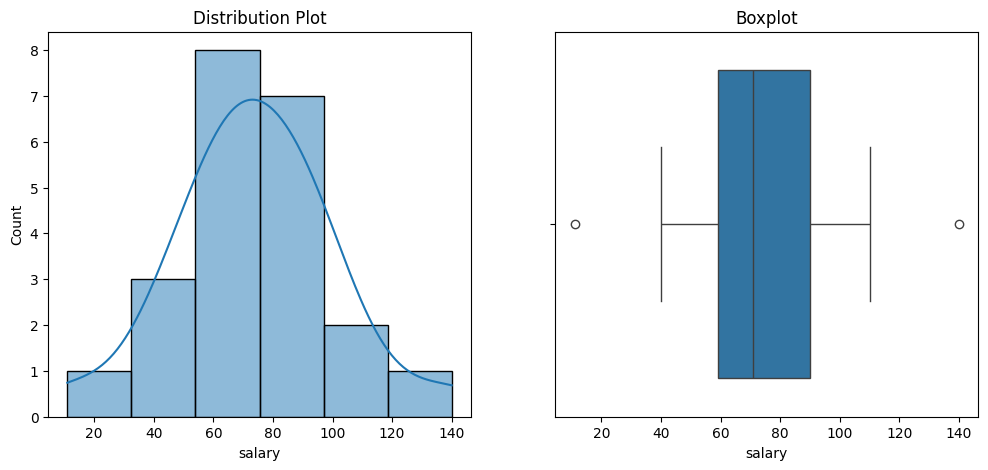

In [23]:
plt.figure(figsize=(12,5))

# Distplot (actually histplot with kde=True)
plt.subplot(1,2,1)
sns.histplot(df['salary'], kde=True)
plt.title("Distribution Plot")

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=df['salary'])
plt.title("Boxplot")

plt.show()

In [24]:
# here the distribution is not skewed as the outlier are present on the both sides
# in the box plt we can see outliers

# dropping the outliers
# capping the outlier
# replacing th eoutliers with mean and median

In [ ]:
# dropping the outliers
# q1-1.5*iqr>> lower fence 
# q3+1.5*iqr.. upper fence


# dropping the outliers

In [29]:
Q1=df['salary'].quantile(.25)
Q3=df['salary'].quantile(.75)

IQR=Q3-Q1

lower_fence=Q1-1.5*IQR;
upper_fence=Q3+1.5*IQR;


#now we will remove all the values that lies outside the rage of fences

In [32]:
df_filter=df[(df.salary>=lower_fence) & (df.salary<=upper_fence)]

In [31]:
df.shape

(22, 1)

In [33]:
df_filter.shape

(20, 1)

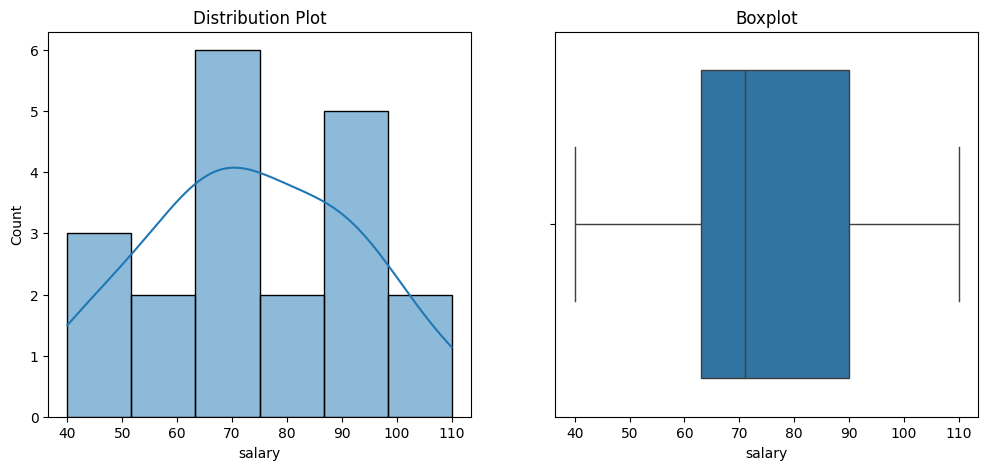

In [34]:
plt.figure(figsize=(12,5))

# Distplot (actually histplot with kde=True)
plt.subplot(1,2,1)
sns.histplot(df_filter['salary'], kde=True)
plt.title("Distribution Plot")

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=df_filter['salary'])
plt.title("Boxplot")

plt.show()

# imputation with mean and median

In [38]:
df['salary_imputed_mean'] = np.where(
    (df.salary >= upper_fence) | (df.salary <= lower_fence),
    df['salary'].mean(),
    df['salary']
)


In [39]:
df

,salary,salary_imputed_mean
0,11,73.818182
1,40,40.000000
2,45,45.000000
3,66,66.000000
4,65,65.000000
5,68,68.000000
6,78,78.000000
7,90,90.000000
8,57,57.000000
9,74,74.000000


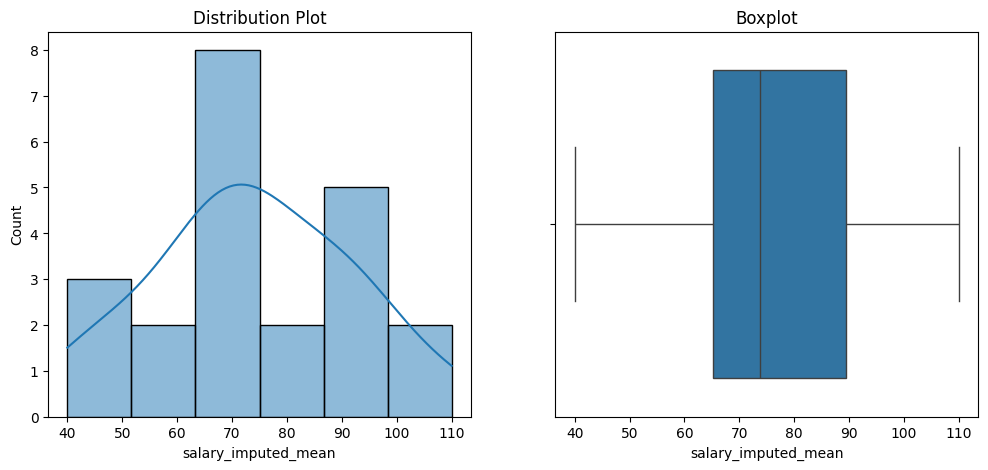

In [40]:
plt.figure(figsize=(12,5))

# Distplot (actually histplot with kde=True)
plt.subplot(1,2,1)
sns.histplot(df['salary_imputed_mean'], kde=True)
plt.title("Distribution Plot")

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=df['salary_imputed_mean'])
plt.title("Boxplot")

plt.show()

In [ ]:
#  by median

df['salary_imputed_median'] = np.where(
    (df.salary >= upper_fence) | (df.salary <= lower_fence),
    df['salary'].median(),
    df['salary']
)


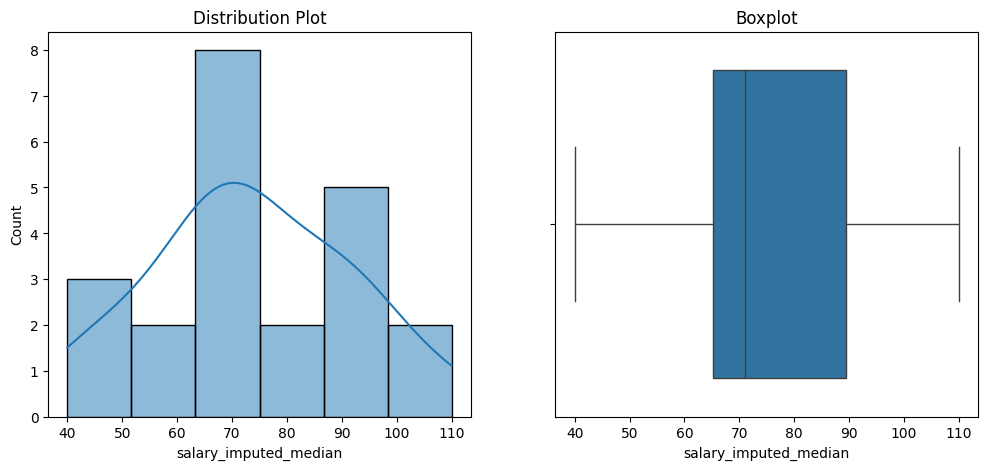

In [42]:
plt.figure(figsize=(12,5))

# Distplot (actually histplot with kde=True)
plt.subplot(1,2,1)
sns.histplot(df['salary_imputed_median'], kde=True)
plt.title("Distribution Plot")

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=df['salary_imputed_median'])
plt.title("Boxplot")

plt.show()

# capping with a outlier

### replacing the nearest value which is not outlier

In [43]:
df

,salary,salary_imputed_mean,salary_imputed_median
0,11,73.818182,71.0
1,40,40.000000,40.0
2,45,45.000000,45.0
3,66,66.000000,66.0
4,65,65.000000,65.0
5,68,68.000000,68.0
6,78,78.000000,78.0
7,90,90.000000,90.0
8,57,57.000000,57.0
9,74,74.000000,74.0


In [44]:
lower_cap=df['salary'].quantile(.05) #lower cap at 5th percentile
upper_cap=df['salary'].quantile(.95) #upper cap 95th percentile

In [45]:
lower_cap

np.float64(40.25)

In [46]:
upper_cap

np.float64(109.55)

### so what this upper and lower cap means the value that are smaller than lower cap will get replaced by the lower cap and which are higher than upper cap will get replced by the upper cap value

In [47]:
# now how to do this capping

In [49]:
df['salary_capped'] = np.where(
    df['salary'] < lower_cap, lower_cap,      # if less than lower_cap
    np.where(
        df['salary'] > upper_cap, upper_cap,  # else if greater than upper_cap
        df['salary']                          # else keep same
    )
)
